<a href="https://colab.research.google.com/github/ojaswijain/MarsRoverTeam/blob/main/Assignment%202/CatDog.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
! pip install -q kaggle
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"ojaswijain","key":"66446f59f2bccd08dcc9310701d51334"}'}

In [6]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
!kaggle competitions download -c dogs-vs-cats

  0% 0.00/86.8k [00:00<?, ?B/s]
100% 86.8k/86.8k [00:00<00:00, 75.5MB/s]
 98% 265M/271M [00:02<00:00, 95.0MB/s]
100% 271M/271M [00:02<00:00, 115MB/s] 
 97% 526M/543M [00:03<00:00, 151MB/s]
100% 543M/543M [00:04<00:00, 141MB/s]


In [7]:
! unzip train.zip -d train

Streaming output truncated to the last 3 lines.
  inflating: train/train/dog.9997.jpg  
  inflating: train/train/dog.9998.jpg  
  inflating: train/train/dog.9999.jpg  


In [20]:
from os import makedirs
from os import listdir
from shutil import copyfile
import random
# create directories
dataset_home = 'dataset_dogs_vs_cats/'
subdirs = ['train/', 'test/']
for subdir in subdirs:
	# create label subdirectories
	labeldirs = ['dogs/', 'cats/']
	for labldir in labeldirs:
		newdir = dataset_home + subdir + labldir
		makedirs(newdir, exist_ok=True)
random.seed(1)
# copy training dataset images
src_directory = 'train/train/'
for file in listdir(src_directory):
  src = src_directory + file
  a=random.random()
  if a < 0.01:
    dst_dir = 'test/'
  elif a > 0.9:
    dst_dir = 'train/'
  else:
    continue
  if file.startswith('cat'):
    dst = dataset_home + dst_dir + 'cats/'  + file
    copyfile(src, dst)
  elif file.startswith('dog'):
    dst = dataset_home + dst_dir + 'dogs/'  + file
    copyfile(src, dst)

In [25]:
import sys
from matplotlib import pyplot as plt
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.preprocessing.image import ImageDataGenerator
 
# define cnn model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(200, 200, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
 

train_data = ImageDataGenerator(rescale=1.0/255.0,
	width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
test_data = ImageDataGenerator(rescale=1.0/255.0)

train_it = train_data.flow_from_directory('dataset_dogs_vs_cats/train/',
	class_mode='binary', batch_size=64, target_size=(200, 200))
test_it = test_data.flow_from_directory('dataset_dogs_vs_cats/test/',
	class_mode='binary', batch_size=64, target_size=(200, 200))

history = model.fit(train_it, steps_per_epoch=len(train_it),
	validation_data=test_it, validation_steps=len(test_it), epochs=50, verbose=0)

Found 2525 images belonging to 2 classes.
Found 286 images belonging to 2 classes.


In [35]:
error,acc = model.evaluate(test_it, steps=len(test_it), verbose=0)
print('Test Loss: %f' %error)
print('Accuracy: %f' % (acc * 100.0))

Test Loss: 0.506546
Accuracy: 75.874126


In [45]:
from tensorflow import keras
files.upload()
new_model=models.load_model("basic_model.h5")

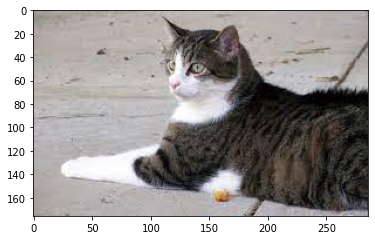

This is a cat


In [68]:
from tensorflow.keras.preprocessing import image as im
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import image
def predictor(x):
  img = image.imread(x)
  plt.imshow(img)
  plt.show()
  img = im.load_img(x, target_size=(200, 200))
  img_array = im.img_to_array(img)
  img_batch = np.expand_dims(img_array, axis=0)
  a=new_model.predict(img_batch)
  u=(float)(a[0])
  if u<0.5:
    print("This is a cat")
  else: 
    print("This is a dog")

predictor("cat.jpg")

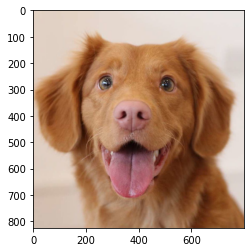

This is a dog


In [69]:
predictor("dog.jpg")

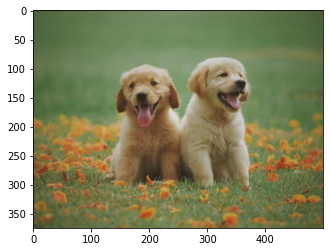

This is a dog


In [71]:
#files.upload()
predictor("catty.jpg")